# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.round(min(prices),2)

# TODO: Maximum price of the data
maximum_price = np.round(max(prices),2)

# TODO: Mean price of the data
mean_price = np.round(np.mean(prices),2)

# TODO: Median price of the data
median_price = np.round(np.median(prices),2)

# TODO: Standard deviation of prices of the data
std_price = np.round(np.std(prices),2)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.94
Median price $438900.0
Standard deviation of prices: $165171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: ** To check the respective relationships, i plotted the scatterplots as below.

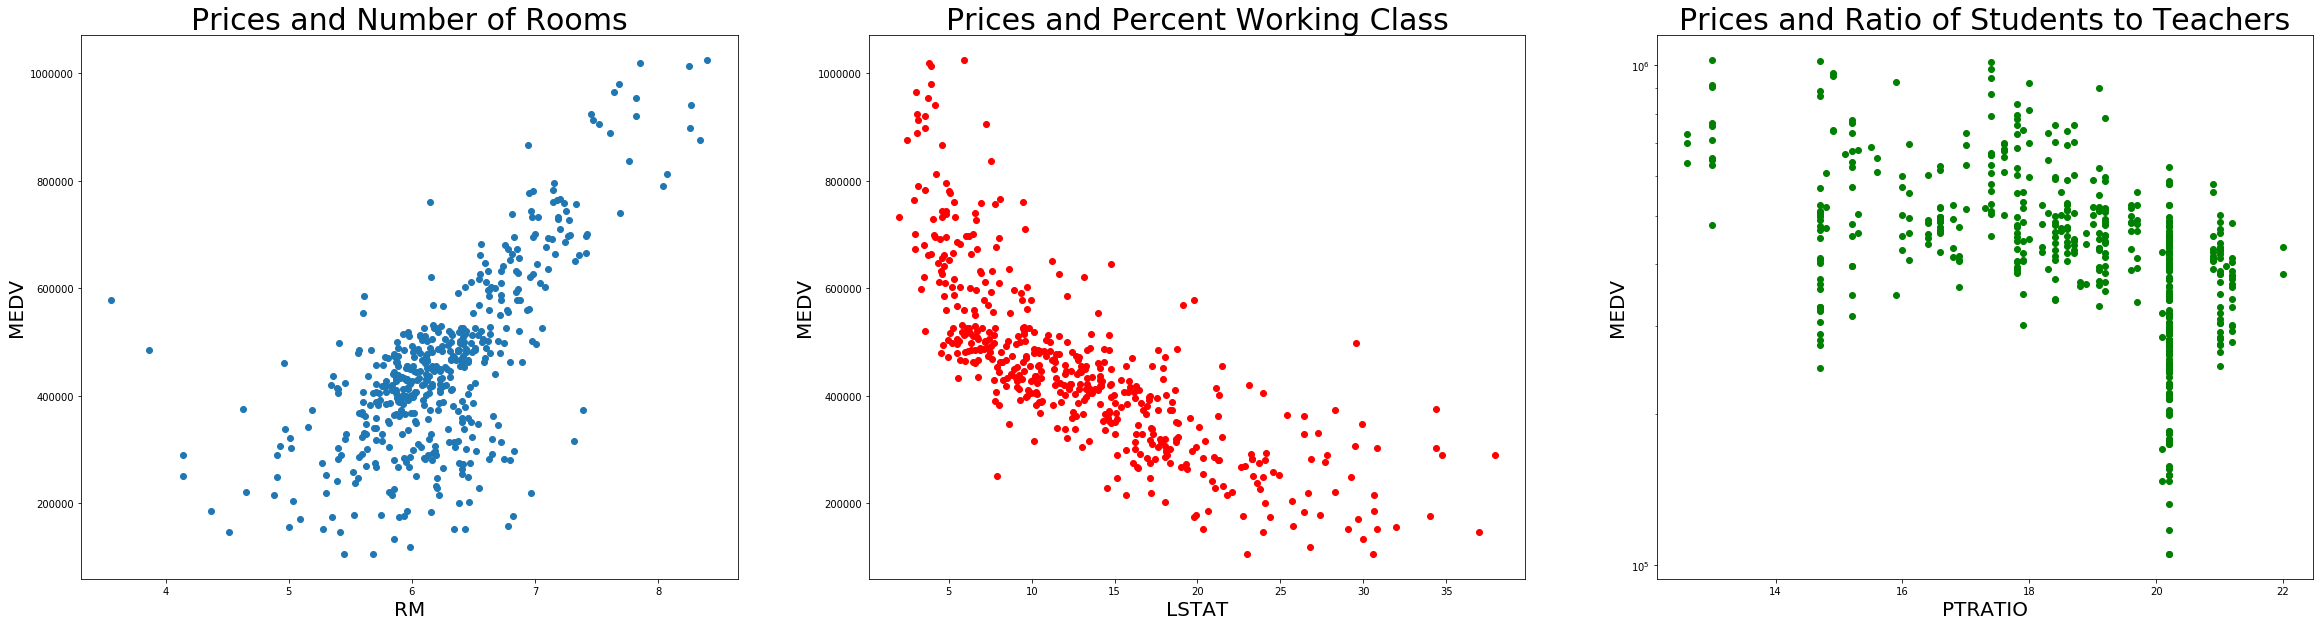

In [4]:
# Import The Library Needed
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plot the Scatterplots
fig = plt.figure()
plt.figure(figsize=(40,10))

# Plot 1
plt.subplot(1, 3, 1)
plt.scatter(x=data['RM'],y=prices)
plt.xlabel('RM',fontsize=20)
plt.ylabel('MEDV',fontsize=20)
plt.title("Prices and Number of Rooms",fontsize=30)


# Plot 2
plt.subplot(1, 3, 2)
plt.scatter(x=data['LSTAT'],y=prices,color="red")
plt.xlabel('LSTAT',fontsize=20)
plt.ylabel('MEDV',fontsize=20)
plt.title("Prices and Percent Working Class",fontsize=30)


#Plot 3
plt.subplot(1, 3, 3)
plt.scatter(x=data['PTRATIO'],y=prices,color="green")
plt.xlabel('PTRATIO',fontsize=20)
plt.ylabel('MEDV',fontsize=20)
plt.title("Prices and Ratio of Students to Teachers",fontsize=30)
plt.yscale('log')


# Show the Plot
plt.show()


We can infer the following from the above scatterplots,

* As the number of rooms (RM) goes up, the price of home will also go up. This makes sense as a house with more rooms will have a higher pricing than compared to a similar house with less rooms. By similar house, i am referring to the same features.


* As the percent of working class (LSTAT) goes up, the price of home will go down. This also makes sense. The price of a house in a good neighborhood with low poverty rate will be higher as compared to the same house (same features) in a poor neighborhood with high poverty rate.


* As the ratio of students to teachers (PTRATIO) goes up, the price of house will go down. This also translates well into real world reasoning. A house in a good school district will have a higher selling price as compared to a similar house in a bad school distrct.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict) 
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** To answer this question, we need an understanding of $R^2$. 

$R^2$ score is defined as following

$$  R^2 =\frac{SSR}{SST} \Longrightarrow 1-\frac{SSE}{SST} $$
Where; 
1. SST = Total sum of squares 
2. SSR = sum of squares explained by regression model
3. SSE = sum of squared errors

Or intuitively,
$$ R^2 = \frac{Explained Variation}{Total Variation}$$

Looking at above equations, we can say that this score metric measures the variance in dependent variable (Y) that can be explained by the model fitted on independent variables or features (X). Also, we can see that $R^2$ can take values from 0 to 1.

Using this understanding, we can infer that this model has a $R^2$ score of 0.923; which means that it captures the variation of target variable really well. In other words, we can say that 92.3% of variance in Y is predictable from the this model that is fitted on X.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2,train_size=0.8,random_state=33)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: ** In Short,the main reason to split a dataset is to check for generalization of our model for unseen data. 

The main purpose of creating a model is to make sure that it can make correct predictions on unseen data. We can always fit a model to that is 100% fitted correctly on seen data like training dataset. However, the goal of model building is to generalize on unseen dataset. In this case, the test dataset. Splitting the dataset into training and test sets allows us to see how the model will generalize on unseen data. There are other benefits as well like splitting the dataset guards us from biased predictions. it also enables us to choose the right learning algorithm and the correct tuning parameters. without splitting the dataset, we will certainly run into overfitting or underfitting issues. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

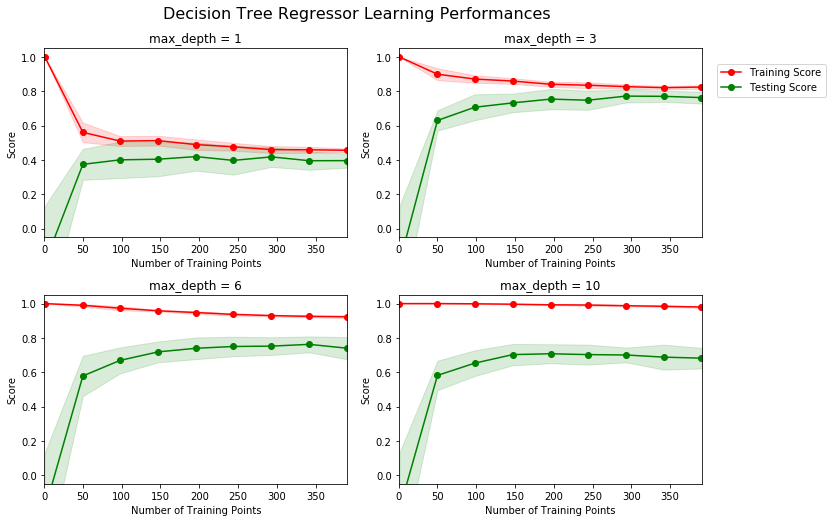

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: ** Generally, the relationship between complexity and performance of the model follows a curve that initially increases and then starts declining afterwards. For example, the testing and training score converges to 0.8 till the max depth of 3. Afterwards, adding more max depth only reduces this convergence score. Some points we can make are as following;

* Looking at the topright graph, the maximum depth of the model is 3. 
* As more training points are added, both the training and testing curves converge at a score of 0.8. The difference is that they that converge differntly. training curve coverges from above and testing curve converges from below. 
* Having more training points will definetely benefit the model. However, this is true to only a certain extent. we can see from the above graph that after 250 training points, the training and test curve seem to flatten out. Furtheremore; even as more points are added, the score is virtually the same after reaching this point.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

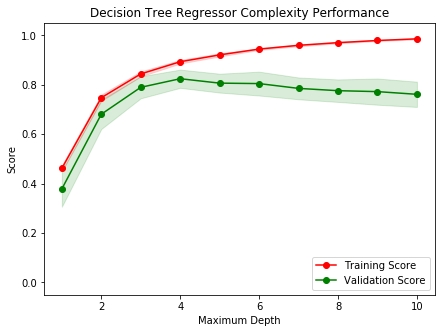

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: ** Looking at the graph, its clear that model is optimized when max depth is 4. Any models before this point are underfitting and any models after this point are overfitting. Some points we can make are as following;

* When the model is trained with a maximum depth of 1, the model suffers from high bias.
* When the model is trained with a maximum depth of 10, the model suffers from high variance.

The visual clues that help in answering this question are as following
* The shaded region of training and testing curves.
* The space between training and testing curves.
* The shape of the curves themselves.




### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: ** The best model happens at a max depth of 4. Intuitively, the tuning parameter follows an increase and then a decrease in a validation metric (score). In other words, there is a point where trade off between bias and variance of the model is optimized. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: ** In the above example; when we were optimizing the decision tree learning algorithim, we used the "max depth" tuning hyperparameter to optimize the model. However, we provided a list of values of max depth from 1 to 10 and plotted the performance curves to check the results. This manual specification of values from 1 to 10 for "max depth" parameter in a decision tree can be thought of as a simple grid search. 

Grid search technique is a way to optimize a model by manually specifying a range of values for tuning hyperparameters. In General, grid search technique is really useful when we have two or more tuning hyperparameters that are continous. In our above example of decision tree classifier; we may want to tune two hyperparameters like max depth and max features.

1. Max Depth = {1,2,3,4,5,6,7,8,9,10}
2. Max Features = {1,2,3}

Grid seach technique will take values from Max Depth and Max Features in pairs until all possible combinations are exhausted. The respective results can then be plotted as performance curves so that the model be optimized for unseen data. 


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: ** k-fold cross validation is a validation technique that tests whether a given learning algorithm is properly trained or not. by properly trained, i am referring to the unbiased estimate of model generalization on unseen data. 

The algorithim can formally be explained as following steps.

1. Divide the dataset into k subsets.
2. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put togather to form a training set.
3. Then the average error across all k trials is computed.

We can think of k here as subsets of our original dataset. 

To understand how k-fold cross validation technique; we can look at the example of our boston housing data. The boston housing data has 489 observations. We split these observations into 80/20 split meaning that 391 observations are randomly put into training dataset and the remaining 98 are put into testing dataset. if we assume k=10, than we would divide the training dataset of 489 into 10 folds. each fold will have around 49 observations. (Since 489 is not an even number, 9 folds will have 49 observation and the last fold will have 48 observations). Next, we will train our decision tree model on 9 folds and last 1 fold will be used as a validation set. This process is repeated until each fold has been used as a validation set. Going through each iteration, we note down the evaluation metric.  Since k=10 here, we would have 10 evaluation metrics. lets suppose the evaluation metric is $R^2$ score here. Therefore; for each iteration we get a $R^2$ value. At the end of 10 iterations, we get 10 $R^2$ values. We average the $R^2$ value here to get a single $R^2$ value. This single value or average of all iterations $R^2$ is needed to optimize the model for unseen data.

The main goal of going through each iteration is to help us choose a set of hyperparamters that will generalize well on unseen data in an unbiased way. In grid search, we specify a range of hyperparamters that need to be validated. Each of these combinations are put into k-fold cross validation iterations. The end result is that we get a $R^2$ score per each combination of hyperparamter. we get something like this

* Combination 1: Max Depth = {1} and Max Features = {2} and average $R^2$ score from K cross validation is 0.73
* Combination 2: Max Depth = {1} and Max Features = {3} and average $R^2$ score from K cross validation is 0.85
* ....
* ....
* $\downarrow$

* Combination 30: Max Depth = {10} and Max Features = {3} and Average $R^2$ score from K cross validation is 0.65


Finally, the model is tested on remaining 98 observations from the first train test data split to see how well the model does. We could have simply used the train/test split on the original dataset to optimize the hyperparamters but this has a risk. The data set in a fixed train-test method may result in a combination that is only good in that particular training and testing dataset. To reduce this bias,  k-fold cross validation is used.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV 

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
        
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 33)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':list(range(1,11))}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** The optimial max depth is 5. Compared to our earlier observations in Question 6, it is pretty close to 4 that we guessed from graphs.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [13]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $424,316.67
Predicted selling price for Client 2's home: $191,940.00
Predicted selling price for Client 3's home: $892,850.00


**Answer: ** I would advice each client as following

1. For Client 1, Recommended selling price would be \$424,316.67.This makes sense as this client's house has 5 rooms, average poverty percent and average school neighborhood. Compared to an median price of \$438,900.00 in the neighborhood, this is a reasonable price.


2. For Client 2, Recommended selling price would be \$191,940.00.This makes sense as this client's house has 4 rooms, highest poverty percent and worst school neighborhood. Compared to minimum price of \$105,000.00 in the neighborhood, this is a reasonable price.


3. For Client 3, Recommended selling price would be \$892,850.00. This makes sense as this client's house has 8 rooms, lowest poverty percent and best school neighborhood. Compared to maximum price of \$1.0248 Million in the neighborhood, this is a reasonable price.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $20,959.06


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: ** In real-world setting, this model should not be used. The main reasons are as following

1. Compared to 1978, The boston housing market has changed considerably today. This means that the underlying data for our model is significantly different. We can adjust prices by taking inflation factor into account but it still doesn't fix the feature space for model. For example, the percent of working class (LSTAT) and ratio of students to teachers (PTRATIO) has definitely changed from 1978.

2. Other features like quality of appliances, square feet of lot, pool, year built, condition of house and other features should be considered for the model. We do want a model that has the minimum number of features to rely on but at the same time, we want to atleast consider other good features in model building. I think its important these features be atleast recorded so that we can infer if they are useful or not. Intuitively, Above mentioned features seem important.

3. Looking at the sensitivty analysis from above;the model seems robust enough to make good consistent productions but i don't agree with this. The underlying learning alogorithm of decision tree is not robust. Any small changes in the data and predictions will be completly different. I highly doubt that predictions will be consistent when applied on real-world data.

4. The model is not applicable to other housing markets like rural areas or low density cities like Houston.

5. A single individual home can have a completely different characteristics than tha entire neighborhood. However, it is still fair to use a model here. The reasoning is that the model predicts the expected price given the certain characteristics of the house. if the house has completely different price given the chracteristics than it can possibly mean that there is another important feature that is not being considered or that particular house is an outlier/exception.I think the issue here is that we have used the decision tree classifier. Which will most often overfit. Given the limited set of features to predicts prices and overfitting nature of our learning algorithm, there is a very little chance that this model will work well in real-world setting. The reason is that our learning algorithm is very senstive to any small changes in data. 

In conclusion,i think that this model should be expanded with other features,the underlying data should also be updated and other learning alogorithms for regression should be tested.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.